<a href="https://colab.research.google.com/github/Priya1881/NLP/blob/main/ugam_decode_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd



In [ ]:
df=pd.read_csv('/content/drive/MyDrive/train.csv')

In [ ]:
df.columns

Index(['Id', 'Review', 'Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6136 entries, 0 to 6135
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Id                             6136 non-null   int64 
 1   Review                         6136 non-null   object
 2   Components                     6136 non-null   int64 
 3   Delivery and Customer Support  6136 non-null   int64 
 4   Design and Aesthetics          6136 non-null   int64 
 5   Dimensions                     6136 non-null   int64 
 6   Features                       6136 non-null   int64 
 7   Functionality                  6136 non-null   int64 
 8   Installation                   6136 non-null   int64 
 9   Material                       6136 non-null   int64 
 10  Price                          6136 non-null   int64 
 11  Quality                        6136 non-null   int64 
 12  Usability                      6136 non-null   int64 
 13  Pol

In [ ]:
test=pd.read_csv('/content/drive/MyDrive/test.csv')

In [ ]:
cols_target=['Components', 'Delivery and Customer Support',
       'Design and Aesthetics', 'Dimensions', 'Features', 'Functionality',
       'Installation', 'Material', 'Price', 'Quality', 'Usability',
       'Polarity']

In [ ]:
no_review=df[df['Review'].isnull()]
len(no_review)

0

In [ ]:
print('Total rows in test is {}'.format(len(test)))
print('Total rows in train is {}'.format(len(df)))
print(df[cols_target].sum())

Total rows in test is 2631
Total rows in train is 6136
Components                        274
Delivery and Customer Support     179
Design and Aesthetics             650
Dimensions                        695
Features                          313
Functionality                    2538
Installation                      762
Material                          155
Price                             854
Quality                          2177
Usability                        1229
Polarity                         4770
dtype: int64


In [ ]:
df['char_length'] = df['Review'].apply(lambda x: len(str(x)))

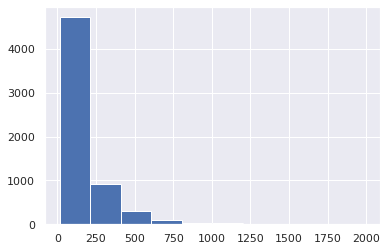

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
df['char_length'].hist()
plt.show()

In [ ]:
data=df[cols_target]

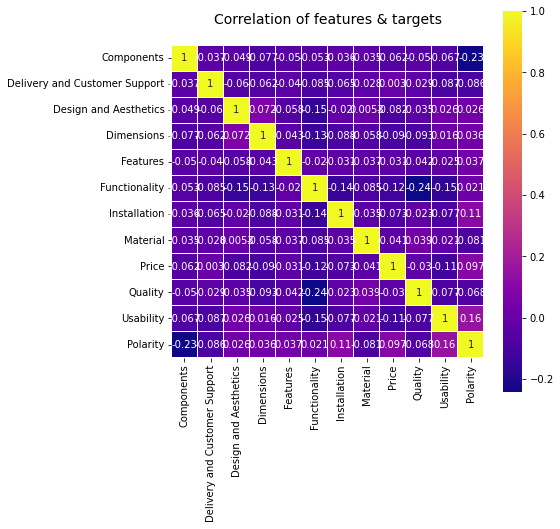

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.plasma
plt.figure(figsize=(7,7))
plt.title('Correlation of features & targets',y=1.05,size=14)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,cmap=colormap,
           linecolor='white',annot=True)

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [ ]:
import re
df['Review'] = df['Review'].map(lambda com : clean_text(com))
test['Review'] = test['Review'].map(lambda com : clean_text(com))

In [ ]:
df['Review']

0       for some reason everybody complains and i am c...
1       i like everything about it great choice of spr...
2       excellent ceiling fan brace easy to install an...
3       work great easy to use no issues at all with h...
4       i would recommend this product because it is p...
                              ...                        
6131    easy to install just be careful with the razor...
6132    got a big pup and she had to learn about scree...
6133    we installed our nest cam system a little over...
6134    this is a below average camera the only thing ...
6135                       so easy to install amd operate
Name: Review, Length: 6136, dtype: object

In [ ]:
df = df.drop('char_length',axis=1)

In [ ]:
import nltk
from nltk.corpus.reader.wordnet import WordNetError
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords=stopwords.words('english')
def remove_stopwords(text):
  clean_text=[]
  for word in text.split():
    if word not in stopwords:
      clean_text.append(word)
  return " ".join(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
test['Review']

0       made of very thin cheap metal broke on very fi...
1       as good as the brand names no jams or misfires...
2       unit was easy to use with understandable in st...
3       i am the new family plumber works well no prob...
4                             seems to be holding up well
                              ...                        
2626    very strong piece of hardware easy to adjust a...
2627    great supot square wich is better to line up t...
2628                no jams no problems good quality nail
2629    chair cushion is and very firm however nice re...
2630    easy to work with and install we use this for ...
Name: Review, Length: 2631, dtype: object

In [ ]:
X = df['Review']
test_X = test['Review']

In [ ]:
# import and instantiate TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = CountVectorizer(ngram_range=(1,3),stop_words='english')
vect

CountVectorizer(ngram_range=(1, 3), stop_words='english')

In [ ]:
X_dtm = vect.fit_transform(X)
test_X_dtm = vect.transform(test_X)

In [ ]:
# import and instantiate the Logistic Regression model
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,f1_score
logreg = LogisticRegression(C=12.0,max_iter=150)

# create submission file
submission_binary = pd.read_csv('/content/drive/MyDrive/submission.csv')

for label in cols_target:
    print('... Processing {}'.format(label))
    y = df[label]
    # train the model using X_dtm & y
    logreg.fit(X_dtm, y)
    
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training accuracy is {}'.format(f1_score(y, y_pred_X)))
    # compute the predicted probabilities for X_test_dtm
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    
    submission_binary[label] = test_y_prob.clip(0.025,0.975)

In [ ]:
submission_binary.head()

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0.975,0.025,0.025,0.025,0.025,0.035190,0.025000,0.046896,0.025,0.412539,0.025,0.025000
1,0.025,0.025,0.025,0.025,0.025,0.975000,0.025000,0.025000,0.025,0.070930,0.025,0.975000
2,0.025,0.025,0.025,0.025,0.025,0.025000,0.059056,0.025000,0.025,0.025000,0.975,0.975000
3,0.025,0.025,0.025,0.025,0.025,0.975000,0.032499,0.025000,0.025,0.074503,0.025,0.975000
4,0.025,0.025,0.025,0.025,0.025,0.354915,0.025000,0.025000,0.025,0.393741,0.025,0.870154


In [ ]:
submission_binary.to_csv('submission_binary.csv',index=False)

In [ ]:
# create submission file
submission_chains = pd.read_csv('/content/drive/MyDrive/submission.csv')

# create a function to add features
def add_feature(X, feature_to_add):
    '''
    Returns sparse feature matrix with added feature.
    feature_to_add can also be a list of features.
    '''
    from scipy.sparse import csr_matrix, hstack
    return hstack([X, csr_matrix(feature_to_add).T], 'csr')

In [ ]:
for label in cols_target:
    print('... Processing {}'.format(label))
    y = df[label]
    # train the model using X_dtm & y
    logreg = LogisticRegression(max_iter=150)
    logreg.fit(X_dtm,y)
    # compute the training accuracy
    y_pred_X = logreg.predict(X_dtm)
    print('Training Accuracy is {}'.format(accuracy_score(y,y_pred_X)))
    # make predictions from test_X
    test_y = logreg.predict(test_X_dtm)
    test_y_prob = logreg.predict_proba(test_X_dtm)[:,1]
    submission_chains[label] = test_y_prob.clip(0.025,0.975)
    # chain current label to X_dtm
    X_dtm = add_feature(X_dtm, y)
    print('Shape of X_dtm is now {}'.format(X_dtm.shape))
    # chain current label predictions to test_X_dtm
    test_X_dtm = add_feature(test_X_dtm, test_y)
    print('Shape of test_X_dtm is now {}'.format(test_X_dtm.shape))

... Processing Components
Training Accuracy is 0.9871251629726207
Shape of X_dtm is now (6136, 5001)
Shape of test_X_dtm is now (2631, 5001)
... Processing Delivery and Customer Support
Training Accuracy is 0.9938070404172099
Shape of X_dtm is now (6136, 5002)
Shape of test_X_dtm is now (2631, 5002)
... Processing Design and Aesthetics
Training Accuracy is 0.9804432855280313
Shape of X_dtm is now (6136, 5003)
Shape of test_X_dtm is now (2631, 5003)
... Processing Dimensions
Training Accuracy is 0.9768578878748371
Shape of X_dtm is now (6136, 5004)
Shape of test_X_dtm is now (2631, 5004)
... Processing Features
Training Accuracy is 0.983702737940026
Shape of X_dtm is now (6136, 5005)
Shape of test_X_dtm is now (2631, 5005)
... Processing Functionality
Training Accuracy is 0.9563233376792699
Shape of X_dtm is now (6136, 5006)
Shape of test_X_dtm is now (2631, 5006)
... Processing Installation
Training Accuracy is 0.9895697522816167
Shape of X_dtm is now (6136, 5007)
Shape of test_X_dtm i

In [ ]:
submission_chains.head()

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0.959027,0.025,0.025,0.025000,0.025000,0.025000,0.025000,0.025,0.025000,0.454039,0.025,0.025000
1,0.025000,0.025,0.025,0.025000,0.025000,0.930633,0.025000,0.025,0.025000,0.075905,0.025,0.975000
2,0.025000,0.025,0.025,0.026815,0.025000,0.078596,0.102729,0.025,0.034990,0.112807,0.975,0.975000
3,0.025000,0.025,0.025,0.025000,0.025000,0.975000,0.025000,0.025,0.032643,0.114394,0.025,0.965152
4,0.025000,0.025,0.025,0.037546,0.027234,0.424900,0.025000,0.025,0.033597,0.546843,0.025,0.786038


In [ ]:
# generate submission file
submission_chains.to_csv('submission_chains.csv', index=False)

In [ ]:
# create submission file
submission_combined = pd.read_csv('/content/drive/MyDrive/submission.csv')

In [ ]:
for label in cols_target:
    submission_combined[label] = 0.5*(submission_chains[label]+submission_binary[label])



In [ ]:
submission_combined.head()

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0.967014,0.025,0.025,0.025000,0.025000,0.030095,0.025000,0.035948,0.025000,0.433289,0.025,0.025000
1,0.025000,0.025,0.025,0.025000,0.025000,0.952816,0.025000,0.025000,0.025000,0.073417,0.025,0.975000
2,0.025000,0.025,0.025,0.025908,0.025000,0.051798,0.080893,0.025000,0.029995,0.068904,0.975,0.975000
3,0.025000,0.025,0.025,0.025000,0.025000,0.975000,0.028749,0.025000,0.028822,0.094448,0.025,0.970076
4,0.025000,0.025,0.025,0.031273,0.026117,0.389907,0.025000,0.025000,0.029298,0.470292,0.025,0.828096


In [ ]:
# generate submission file
submission_combined.to_csv('submission_combined.csv', index=False)